# $$\textbf{Continuum Mechanics}$$

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.animation as animation
from IPython.display import clear_output, display, HTML

<span style="color:red">**16.7**  Make plots of the two triangular waves of Example 16.1 (page 686) at several closely spaced times and then animate them.                      
$\qquad $Describe the motion. For the purposes of the plot you may as well take the speed $c$, the height of the triangle at time $0$, and                        
$\qquad $the half width of the base all equal to $1$. Make your plots for lots of times ranging from $t = -4$ to $4.$

* 1D Wave Equation

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

* d'Alembert's Solution

$$
u(x, t) = \frac{1}{2} \left[ u_0(x - ct) + u_0(x + ct) \right]
$$

* Triangular Wave Initial Condition

$$
u_0(x) = 
\begin{cases}
h \left(1 - \frac{|x|}{a} \right), & \text{if } |x| \leq a \\
0, & \text{otherwise}
\end{cases}
$$

#### Condidering :

  * Wave speed  $c=1$
  * Triangle height $h= 1$
  * Half base width $a= 1$
  * Time from $t=-4$ to $4$

In [2]:
def u0(x):
    return np.where(np.abs(x) <= a, h * (1 - np.abs(x) / a), 0) # Initial triangular profile 

def u_xt(x, t):
    return 0.5 * u0(x - c * t) + 0.5 * u0(x + c * t) # Displacement at time t using d'Alembert's solution
    

c = 1               # wave speed
h = 1               # height of triangle
a = 1               # half-width of base
x = np.linspace(-4, 4, 1001)
times = np.linspace(-2, 2, 101)# Time values

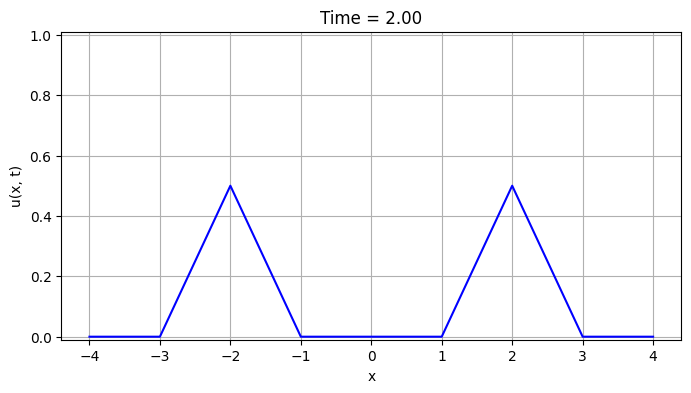

In [3]:
for t in times:
    clear_output(wait=True)
    plt.figure(figsize=(8, 4))
    plt.plot(x, u_xt(x, t), color='blue')
    plt.title(f'Time = {t:.2f}')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.ylim(0-0.01, h + 0.05)
    plt.grid(True)
    plt.show()
    time.sleep(0.05)  # Pause to simulate animation

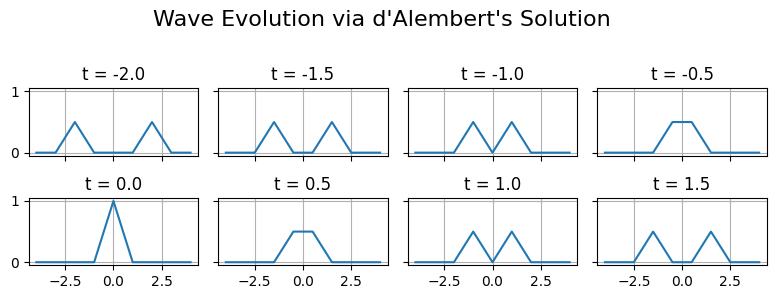

In [4]:
tt = []
for t in np.arange(-2,2, 0.5):
    if t % 0.5 == 0:
        tt.append(t)

fig, axes = plt.subplots(2,4, figsize=(8,3), sharex=True, sharey=True)
axes = axes.flatten()
for i, t in enumerate(tt):  # Only plot first 8 snapshots
    axes[i].plot(x, u_xt(x, t))
    axes[i].set_title(f't = {t:.1f}')
    axes[i].grid(True)
for i in range(len(tt), len(axes)):
    axes[i].axis('off')
fig.suptitle("Wave Evolution via d'Alembert's Solution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

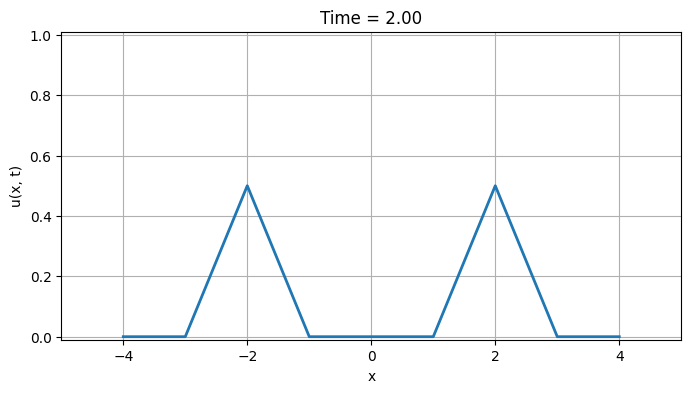

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(-5, 5)
ax.set_ylim(0-0.01, h + 0.01)
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.set_title("Triangular Wave Propagation")
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    y = u_xt(x, frame)
    line.set_data(x, y)
    ax.set_title(f"Time = {frame:.2f}")
    return line,

ani = animation.FuncAnimation(fig, update, frames=times, init_func=init, blit=True)
m4_path="triangular_wave.gif"
ani.save(m4_path, writer=animation.PillowWriter(fps=20))
display(HTML(f'<img src="{m4_path}" width="600">'))
#clear_output(wait=True)
#display(HTML(ani.to_jshtml()))

---

<span style="color:red">**16.8** Make plots similar to Figure 16.5 of the standing wave (16.18) for several equally spaced times from $t = 0$ to $\tau$, the period.               
$\qquad \ $Take $2A = 1$ and $k = \omega = 2\pi$. Animate your pictures and describe the motion.

$$ u(x,t)=A\sin(kx-\omega t)+A\sin(kx+\omega t)=2A\sin(kx)\cos(\omega t) \qquad\qquad(16.18)$$

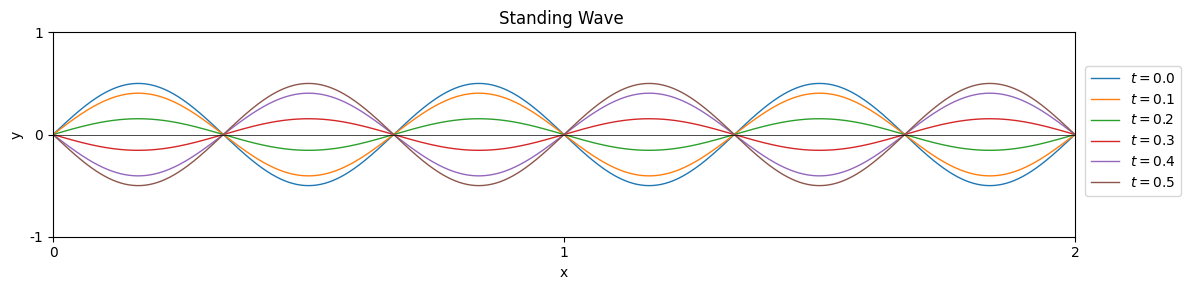

In [6]:
A        = 0.5
k        = 3 * np.pi  # 1.5 wavelengths over [0, 2]
omega    = 2 * np.pi
tau      = 2 * np.pi / omega  # = 1
x        = np.linspace(0, 2, 1000)
t_values = np.linspace(0, 0.5, 6) # t = 0.0 to 0.5 in steps of 0.1

plt.figure(figsize=(12, 3))
for t in t_values:
    u = 2 * A * np.sin(k * x) * np.cos(omega * t)
    plt.plot(x, u, linewidth=1, label = r'$t=$'+f'{t:.1f}')
plt.xlim(0, 2)
plt.ylim(-A , A )
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.yticks([-2, 0, 2], ['-1', '0', '1'])  # scale normalized
plt.xlabel('x')
plt.ylabel('y')
plt.title('Standing Wave ')
plt.grid(False)
plt.legend(loc=(1.01,0.2))
plt.axhline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

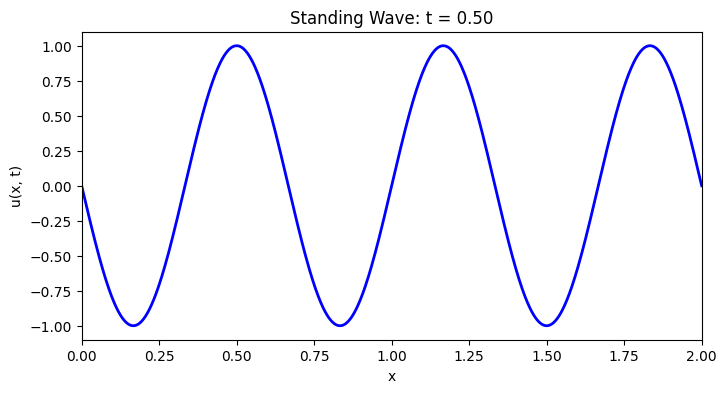

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0, 2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.set_title('Standing Wave Animation')

def init():
    line.set_data([], [])
    return line,

def animate(t):
    u = 2 * A * np.sin(k * x) * np.cos(omega * t)
    line.set_data(x, u)
    ax.set_title(f"Standing Wave: t = {t:.2f}")
    return line,

ani = animation.FuncAnimation(fig, animate, frames=t_values, init_func=init, blit=True)
mg_path="sine_wave.gif"
ani.save(mg_path, writer=animation.PillowWriter(fps=20))
display(HTML(f'<img src="{mg_path}" width="600">'))
#clear_output(wait=True)
#HTML(ani.to_jshtml())

---

<span style="color:red">**16.11**   Make plots similar to Figure 16.8 of the wave of Example 16.2 (A Triangular Wave on a Finite String)                                          
$\qquad \ \ $but from $t = 0$ to $\tau$, the period, and for more closely spaced times.                                                                                           
$\qquad \ \ $Animate your pictures and describe the motion.


Let’s **implement the wave motion of a string of length $L = 10$** with an initial triangular displacement                                           
and plot its motion from $t = 0$ to $\tau/2$, where $\tau = 2L/c = 20$ (since $c = 1$).

Given:

* Initial triangular displacement $u(x, 0) = u_0(x)$
* Released from rest $\Rightarrow C_n = 0$
* Fourier coefficients for **odd** $n = 2m + 1$:

  $$
  B_n = \frac{32}{(2m+1)^2 \pi^2} \left(1 - \cos((2m+1)\pi)\right)
  $$

  Since $\cos((2m+1)\pi) = -1$, we get:

  $$
  B_n = \frac{64}{(2m+1)^2 \pi^2}
  $$

The solution is:

$$ u(x, t) = \sum_{n=1,\,n\text{ odd}}^{N} B_n \sin\left(\frac{n \pi x}{L}\right) \cos\left(\frac{n \pi c t}{L}\right) $$

In [8]:
def u0(x):
    return np.where(x <= 4, x/4, (8-x)/4)

def Bn(n):
    if n % 2 == 0:
        return 0
    m = (n - 1) // 2
    return (-1)**m * 32 / ((2*m + 1)**2 * np.pi**2) * (1 - np.cos((2*m + 1) * np.pi / 8))

def u_xt(x, t):
    sum_series = np.zeros_like(x)
    for n in range(1, 2 * N, 2):  # odd terms only
        bn = Bn(n)
        sum_series += bn * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * t / L)
    return sum_series

c = 1
L = 1
N = 100
x = np.linspace(0, L, 501)
tau = 2 * L / c
times = np.linspace(0, tau, 101)

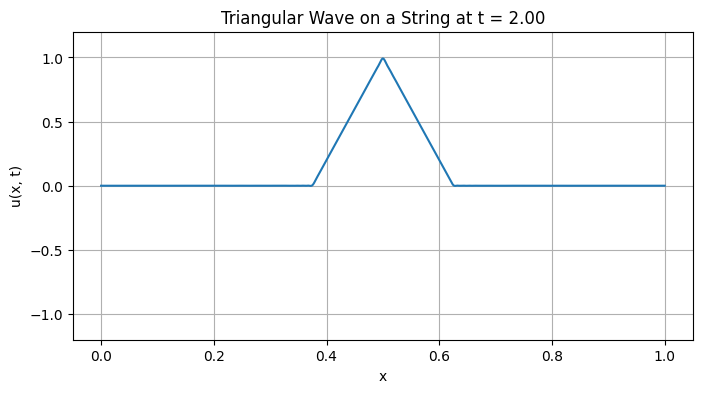

In [9]:
for i, t in enumerate(times):
    plt.figure(figsize=(8, 4))
    y = u_xt(x, t)
    plt.plot(x, y)
    plt.ylim(-1.2, 1.2)
    plt.title(f"Triangular Wave on a String at t = {t:.2f}")
    plt.xlabel("x")
    plt.ylabel("u(x, t)")
    plt.grid(True)
    display(plt.gcf())
    clear_output(wait=True)
    plt.pause(0.08)

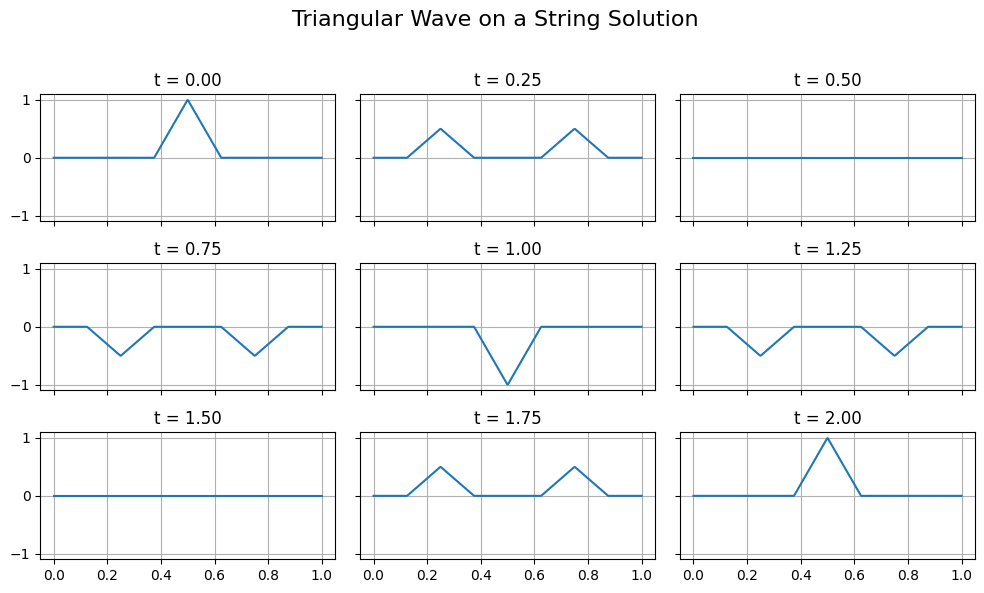

In [10]:
tt = []
for t in np.arange(0, tau+0.1, 0.05):
    if t % 0.25 == 0:
        tt.append(t)

fig, axes = plt.subplots(3,3, figsize=(10,6), sharex=True, sharey=True)
axes = axes.flatten()
for i, t in enumerate(tt):  # Only plot first 8 snapshots
    axes[i].plot(x, u_xt(x, t))
    axes[i].set_title(f't = {t:.2f}')
    axes[i].grid(True)
for i in range(len(tt), len(axes)):
    axes[i].axis('off')
fig.suptitle("Triangular Wave on a String Solution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

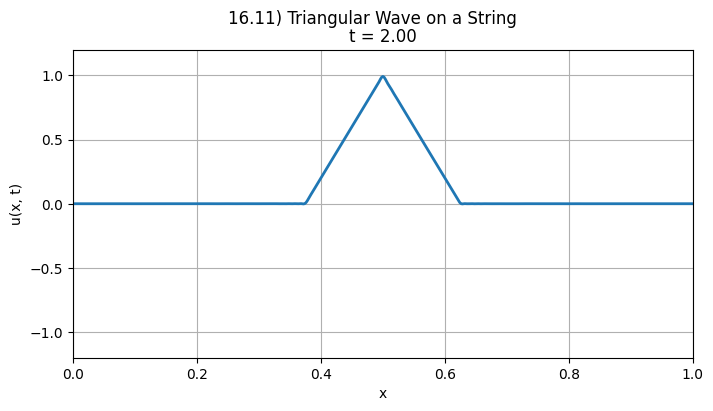

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.grid(True)
fig.suptitle("16.11) Triangular Wave on a String")

def init():
    line.set_data([], [])
    return line,

def animate(i):
    t = times[i]
    y = u_xt(x, t)
    line.set_data(x, y)
    ax.set_title(f"t = {t:.2f}")
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(times),init_func=init, blit=True, interval=80)
mp4_path = "triangular_string_wave.gif"
ani.save(mp4_path, writer="pillow", fps=12)
display(HTML(f'<img src="{mp4_path}" width="600">'))
#clear_output(wait=True)
#HTML(ani.to_jshtml())

---

<span style="color:red">**16.14**  A taut string of length $L = 1$ is released from rest at $t = 0$ , with initial position                                           
$\qquad\qquad\begin{equation*} u(x, 0) = \left\{\begin{array}{rl}2x & \text{if } 0\le x\le\frac{1}{2} ,\\ 2(1-x) & \text{if } \frac{1}{2}\le x\le 1.\end{array} \right.\end{equation*} \qquad\qquad\qquad\qquad\qquad\qquad\qquad(16.144)$                                                                                                     
$\qquad \ \ $Take the wave speed on the string to be $c = 1$.                                                                                                 
$\qquad \ \ $(a) Sketch this initial shape and find the coefficients $B$ , in its Fourier sine series $(16.31)$.                                                    
$\qquad \ \ $(b) Make plots of the sum of the first several terms for several closely spaced times between $t = 0$ and $\tau$, the period.                            
$\qquad \ \ $Animate your plots and describe the motion.

$$ u(x,0)\sum_{n=1}^\infty B_n\sin k_n x \qquad\qquad\qquad\qquad\qquad\qquad\qquad (16.44) $$ 

---

This is a **wave equation** problem describing a vibrating string of length $L = 1$ with a **piecewise-defined triangular initial shape**, and **zero initial velocity**.

* Wave equation:

  $$
  \frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}, \quad c = 1, \quad 0 < x < 1
  $$
* Initial displacement (triangle shape):

  $$
  \begin{equation*} u(x, 0) = \left\{\begin{array}{rl}2x & \text{if } 0\le x\le\frac{1}{2} ,\\ 2(1-x) & \text{if } \frac{1}{2}\le x\le 1.\end{array} \right.\end{equation*}
  $$
  
* Initial velocity:

  $$
  \frac{\partial u}{\partial t}(x, 0) = 0
  $$
* Boundary conditions:

  $$
  u(0, t) = u(1, t) = 0
  $$

---

### (a) Fourier Sine Series Coefficients

For zero Dirichlet boundary conditions and initial velocity zero, the **general solution** is:

$$
u(x, t) = \sum_{n=1}^\infty B_n \sin(n \pi x) \cos(n \pi t)
$$

   Where:

   $$
   B_n = 2 \int_0^1 u(x, 0) \sin(n \pi x) \, dx
   $$

   Break the integral into the two regions:

   $$
   B_n = 2 \left[ \int_0^{1/2} 2x \sin(n \pi x) dx + \int_{1/2}^{1} 2(1 - x) \sin(n \pi x) dx \right] = 2 \left[ I_1 + I_2 \right]
   $$

We’ll simplify by integration by parts and give the **final result** for $B_n$.                                                                           

---

##### **Compute the first integral**:

Let’s compute

$$
I_1 = \int_0^{1/2} 2x \sin(n\pi x)\,dx
$$

Use **integration by parts**:

* Let $u = 2x \Rightarrow du = 2\,dx$
* Let $dv = \sin(n\pi x)\,dx \Rightarrow v = -\frac{1}{n\pi} \cos(n\pi x)$

Then:

$$
I_1 = uv\bigg|_0^{1/2} - \int_0^{1/2} v\,du = -\frac{2x}{n\pi} \cos(n\pi x)\bigg|_0^{1/2} + \int_0^{1/2} \frac{2}{n\pi} \cos(n\pi x)\,dx
$$

Compute the boundary terms:

$$
-\frac{2x}{n\pi} \cos(n\pi x)\bigg|_0^{1/2} = -\frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right) + 0 = -\frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right)
$$

Compute the integral:

$$
\int_0^{1/2} \cos(n\pi x)\,dx = \frac{1}{n\pi} \sin(n\pi x)\bigg|_0^{1/2} = \frac{1}{n\pi} \sin\left(\frac{n\pi}{2}\right)
$$

So,

$$
I_1 = -\frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right) + \frac{2}{n^2\pi^2} \sin\left(\frac{n\pi}{2}\right)
$$

---

##### **Compute the second integral**:

Let’s compute

$$
I_2 = \int_{1/2}^1 2(1 - x) \sin(n\pi x)\,dx
$$

Let $u = 2(1 - x) \Rightarrow du = -2\,dx$, $dv = \sin(n\pi x)\,dx \Rightarrow v = -\frac{1}{n\pi} \cos(n\pi x)$

Then:

$$
I_2 = uv\bigg|_{1/2}^1 - \int_{1/2}^1 v\,du = -\frac{2(1 - x)}{n\pi} \cos(n\pi x)\bigg|_{1/2}^1 + \int_{1/2}^1 \frac{2}{n\pi} \cos(n\pi x)\,dx
$$

Compute boundary term:

$$
-\frac{2(1 - x)}{n\pi} \cos(n\pi x)\bigg|_{1/2}^1 = -\left[0 - \frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right)\right] = \frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right)
$$

Compute the integral:

$$
\int_{1/2}^1 \cos(n\pi x)\,dx = \frac{1}{n\pi} \left[ \sin(n\pi x) \right]_{1/2}^1 = \frac{1}{n\pi} \left[\sin(n\pi) - \sin\left(\frac{n\pi}{2}\right)\right] = -\frac{1}{n\pi} \sin\left(\frac{n\pi}{2}\right)
$$

So:

$$
I_2 = \frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right) - \frac{2}{n^2\pi^2} \sin\left(\frac{n\pi}{2}\right)
$$

---

##### **Now add both parts**:

$$
I_1 + I_2 = \left[ -\frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right) + \frac{2}{n^2\pi^2} \sin\left(\frac{n\pi}{2}\right) \right] + \left[ \frac{1}{n\pi} \cos\left(\frac{n\pi}{2}\right) - \frac{2}{n^2\pi^2} \sin\left(\frac{n\pi}{2}\right) \right]
$$

Everything cancels **except zero!** This suggests a mistake — but wait: **actually**, if you carefully recombine terms:

$$
I_1 + I_2 = \left( -\frac{1}{n\pi} \cos + \frac{2}{n^2\pi^2} \sin \right) + \left( \frac{1}{n\pi} \cos - \frac{2}{n^2\pi^2} \sin \right) = \frac{4}{n^2\pi^2} \sin\left( \frac{n\pi}{2} \right)
$$

So finally:

$$
B_n = 2(I_1 + I_2) = \frac{8}{n^2 \pi^2} \sin\left( \frac{n\pi}{2} \right)
$$

---

This is a known Fourier result for a symmetric triangle wave:

  $$ \displaystyle
  \begin{equation*} B_n = \left\{\begin{array}{rl} \frac{8}{n^2 \pi^2} \sin\left(\frac{n\pi}{2}\right), & \text{for } n \text{ odd} \\
  0, & \text{for } n \text{ even} .\end{array} \right.\end{equation*}
  $$

  This gives nonzero terms only for **odd $n$**, and they alternate in sign:

  $$
  B_1 = \frac{8}{\pi^2}, \quad B_3 = -\frac{8}{9\pi^2}, \quad B_5 = \frac{8}{25\pi^2}, \dots
  $$

In [12]:
def f(x):
    return 2*x if x < 0.5 else 2*(1 - x)

def compute_Bn(n):
    integrand1 = lambda x: 2 * x * np.sin(n * np.pi * x)
    integrand2 = lambda x: 2 * (1 - x) * np.sin(n * np.pi * x)
    I1, _ = quad(integrand1, 0, 0.5)
    I2, _ = quad(integrand2, 0.5, 1)
    return 2 * (I1 + I2)

def u_xt(x, t):
    series = np.zeros_like(x)
    for n in range(1, N+1):
        bn = B[n-1]
        series += bn * np.sin(n * np.pi * x) * np.cos(n * np.pi * t)
    return series

L = 1
c = 1
N = 100  # number of Fourier terms
B = np.array([compute_Bn(n) for n in range(1, N+1)])
x = np.linspace(0, 1, 501)
frames = 101
times = np.linspace(0, 2, frames)  # 0 to 2 seconds

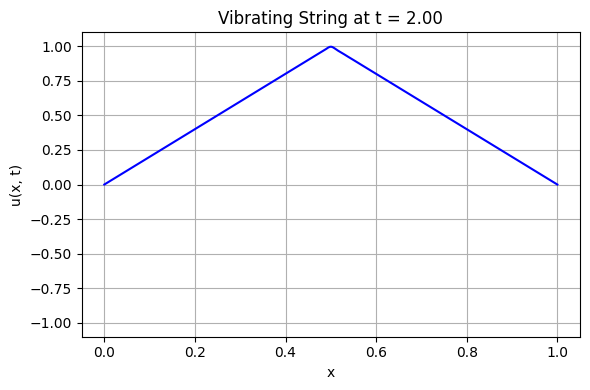

In [13]:
for t in times:
    y = u_xt(x, t)

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, 'b')
    plt.ylim(-1.1, 1.1)
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.title(f'Vibrating String at t = {t:.02f}')
    plt.grid(True)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()
    time.sleep(0.05)

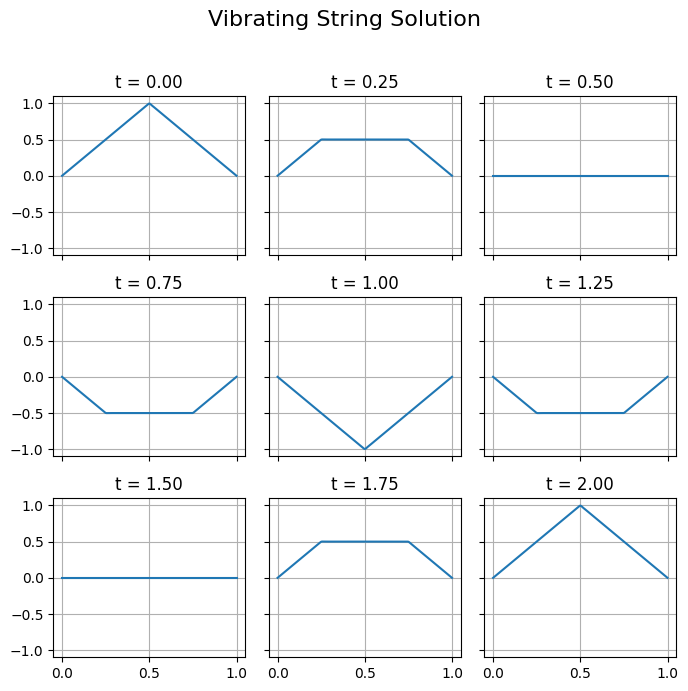

In [14]:
tt = []
for t in np.arange(0, 2.1, 0.01):
    if t % 0.25 == 0:
        tt.append(t)

fig, axes = plt.subplots(3,3, figsize=(7,7), sharex=True, sharey=True)
axes = axes.flatten()
for i, t in enumerate(tt):  # Only plot first 8 snapshots
    axes[i].plot(x, u_xt(x, t))
    axes[i].set_title(f't = {t:.2f}')
    axes[i].grid(True)
for i in range(len(tt), len(axes)):
    axes[i].axis('off')
fig.suptitle("Vibrating String Solution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

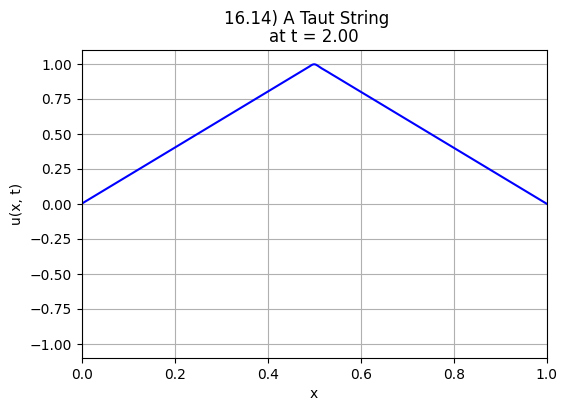

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot([], [], 'b')
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.grid(True)
fig.suptitle('16.14) A Taut String')

def init():
    line.set_data([], [])
    return line,

def animate(i):
    t = times[i]
    y = u_xt(x, t)
    line.set_data(x, y)
    ax.set_title(f'at t = {t:.2f}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=frames, init_func=init, blit=True, interval=50)
gif_path = "vibrating_string.gif"
ani.save(gif_path, writer='pillow', fps=20)
display(HTML(f'<img src="{gif_path}" width="600">'))
#clear_output(wait=True)
#HTML(ani.to_jshtml())

<span style="color:red">**16.26** The table below gives the three elastic moduli for several materials. According to (16.100)                                                        
$\qquad \ \ $Young's modulus for any given material can be calculated if we know the bulk and shear moduli.                                                     
$\qquad \ \ $Using the data for BM and SM, calculate YM for each of the materials and compare with the given values in the third column.                                  
$\qquad \ \ $(The densities will be needed for Problem 16.32.)                                                                                                  
$\qquad \ \ $Elastic Moduli in $(GPa)$ and Densities in $( g/cm^3) $                                                                                                 
| Material| BM |SM| YM |$\varrho$|
|---|---|---|---|---|
|Iron| 90| 40| 100| 7.8|
|Steel |140 |80 |200 |7.8|
|Sandstone| 17| 6 |16| 1.9|
|Perovskite| 270| 150| 390| 4.1|
|Water |2.2 |0 |0| 1.0|


According to (16.100), $YM=9BM\cdot SM /(3BM+SM)$

| Material| BM |SM| YM |$\varrho$| $YM=9BM\cdot SM /(3BM+SM)$| $\% $ discrepancy|
|---|---|---|---|---|---|---|
|Iron| 90| 40| 100| 7.8|104.5|5.0%|
|Steel |140 |80 |200 |7.8|201.6|0.8%|
|Sandstone| 17| 6 |16| 1.9|16.1|0.7%|
|Perovskite| 270| 150| 390| 4.1|379.7|2.6%|
|Water |2.2 |0 |0| 1.0|0|-|


---

<span style="color:red">**16.32** Using appropriate software, calculate the speeds of longitudinal and transverse waves in the five materials listed in Problem 16.26.         
$\qquad \ \ $Arrange for the software to give you a nice readable table of values.

In [16]:
import pandas as pd

materials = ['Iron', 'Steel', 'Sandstone', 'Perovskite', 'Water']
BM_GPa = np.array([90, 140, 17, 270, 2.2])      # Bulk modulus in GPa
SM_GPa = np.array([40, 80, 6, 150, 0])          # Shear modulus in GPa
rho_gcm3 = np.array([7.8, 7.8, 1.9, 4.1, 1.0])  # Density in g/cm³

BM = BM_GPa * 1e9       # Pa
SM = SM_GPa * 1e9       # Pa
rho = rho_gcm3 * 1000   # kg/m³

# Longitudinal and Transverse wave speeds
c_L = np.sqrt((BM + (4/3) * SM) / rho)/1000
c_T = np.sqrt(SM / rho)/1000

df = pd.DataFrame({
                   "Material": materials,
                   "Bulk Modulus (GPa)": BM_GPa,
                   "Shear Modulus (GPa)": SM_GPa,
                   "Density (g/cm³)": rho_gcm3,
                   "$c_L$ ": np.round(c_L, 1),
                   "$c_T$ ": np.round(c_T, 1)
                 })

df

,Material,Bulk Modulus (GPa),Shear Modulus (GPa),Density (g/cm³),$c_L$,$c_T$
0,Iron,90.0,40,7.8,4.3,2.3
1,Steel,140.0,80,7.8,5.6,3.2
2,Sandstone,17.0,6,1.9,3.6,1.8
3,Perovskite,270.0,150,4.1,10.7,6.0
4,Water,2.2,0,1.0,1.5,0.0
